### Student Information
Name:洪千惠

Student ID:109065536

GitHub ID:Carolhch

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
# import useful package first
import numpy as np
import pandas as pd

# 1. exercises in the DM2020-Lab1-Master Repo

## Data Preparation

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### Converting Dictionary into Pandas Dataframe

In [3]:
# TA's helper functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### Adding Columns

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
#Selection using an expression
X.query('category == 2')

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [6]:
#To return a Series of the same shape as the original, but replace the data incompatible 
X.where(X['category'] == 2)

text  category  \
0                                                   NaN       NaN   
1                                                   NaN       NaN   
2                                                   NaN       NaN   
3                                                   NaN       NaN   
4                                                   NaN       NaN   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...       2.0   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...       2.0   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...       2.0   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...       2.0   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...       2.0   

     category_name  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[2257 rows x 3 columns]

In [7]:
#Get item only from object for given key
X.get('category')

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64

In [8]:
#Check wherever the Series elements exist in the passed list
X.isin(['comp.graphics','alt.atheism'])

text  category  category_name
0     False     False           True
1     False     False           True
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [9]:
#use map function as criterion to query
criterion = X['category_name'].map(lambda x: x.startswith('s'))
X[criterion]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[1193 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [12]:
# Answer here
for value in NA_df['missing_example']:
    print(type(value))
#According to the check below:
#1. Although missing_example columns prints out 'NaN' at id 'C' and 'D', they actually are string type values
#2. Although I can't see anything in the missing_example column of id 'F', it actually is a empty string

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


## Sampling

In [13]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [14]:
# sorry, but I have no idea

To generate some visualizations, we are going to use `matplotlib` python library.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

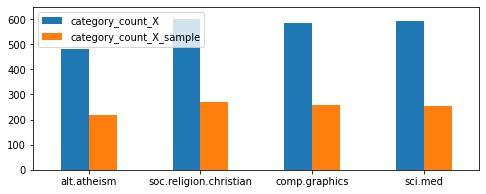

In [16]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 50
# plot barchart
type(X.category_name.value_counts())
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()
# create a dataframe conbime two series
df = pd.DataFrame({'category_count_X': X_counts,
                   'category_count_X_sample': X_sample_counts}, index=categories)
ax = df.plot.bar(rot=0, ylim = [0, upper_bound], figsize = (8,3))

## Feature subset selection

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [18]:
analyze = count_vect.build_analyzer()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [19]:
# Answer here
first_100_count = X_counts[4, 0:100].toarray()
one_count = np.where(first_100_count==1)
index = one_count[1][1]#the index of second value 1
count_vect.get_feature_names()[index]

'01'

In [20]:
import seaborn as sns

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

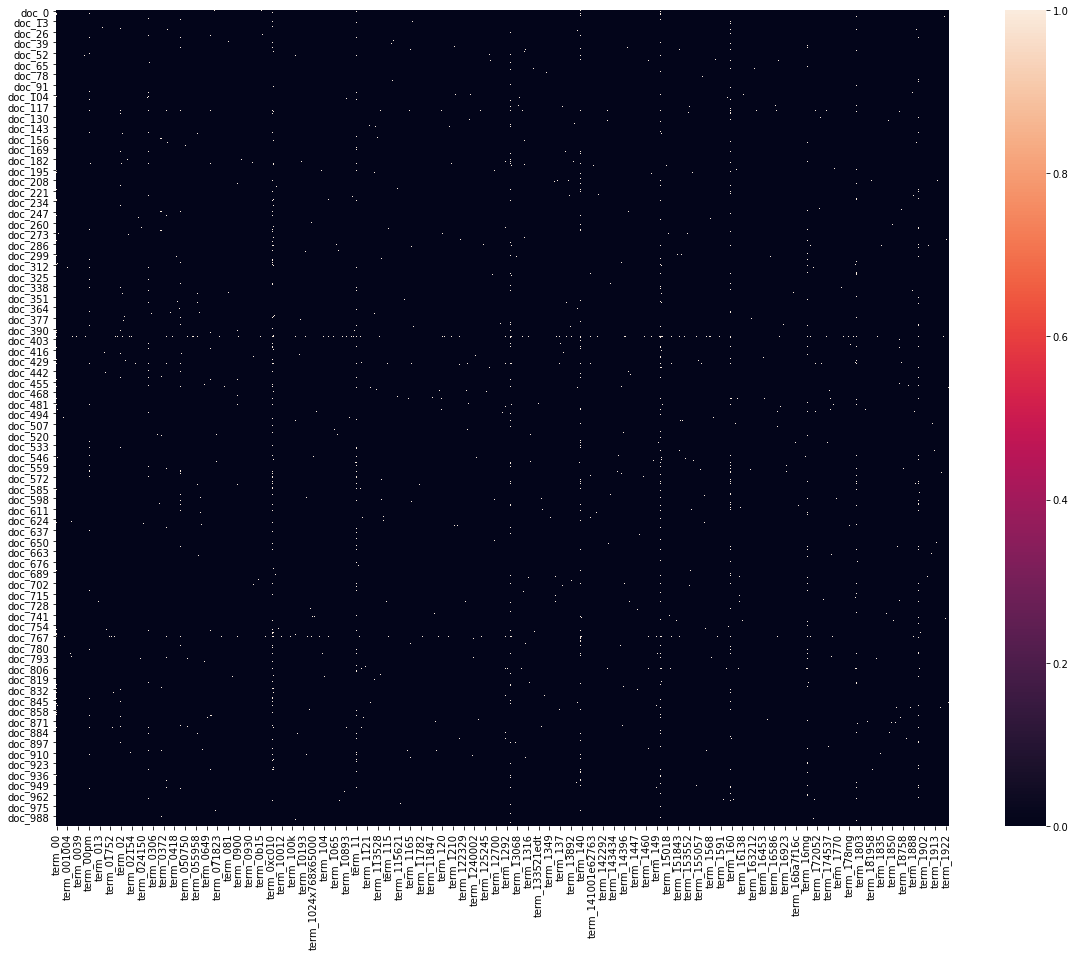

In [21]:
# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:1000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:1000]]
plot_z = X_counts.toarray()[:1000, :1000]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw, vmin=0, vmax=1)

## Dimensionality Reduction

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [22]:
from sklearn.decomposition import PCA

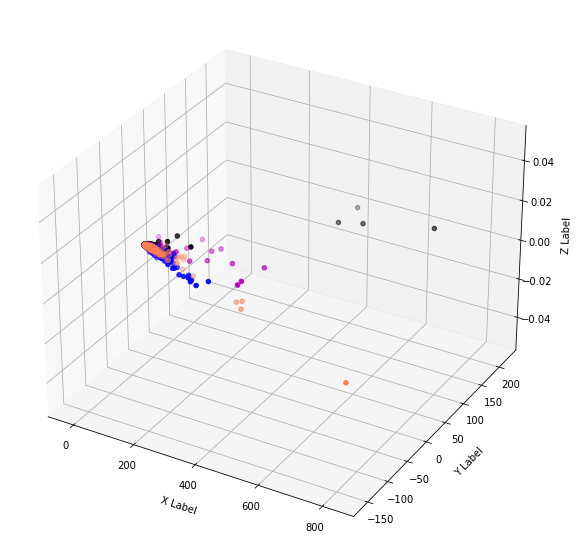

In [23]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## Atrribute Transformation / Aggregation

In [24]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [25]:
# Answer here
# import plotly package
import plotly.graph_objects as go
import plotly.offline as py
import plotly.figure_factory as ff

In [26]:
features = ["term_"+str(i) for i in count_vect.get_feature_names()[0:300]]
frequencies = term_frequencies[:300]
features
data = [go.Bar(
       x = features,
       y = frequencies)]
fig = go.Figure(data=data)
py.iplot(fig)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [27]:
# Answer here
# try to ignore the terms which has less frequencies
index = np.where(term_frequencies[0:3000] > 20)
features = ["term_"+str(i) for i in np.array(count_vect.get_feature_names())[index[0].astype(int)]]
frequencies = np.array(term_frequencies)[index[0].astype(int)]
data = [go.Bar(
       x = features,
       y = frequencies)]
fig = go.Figure(data=data)
py.iplot(fig)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

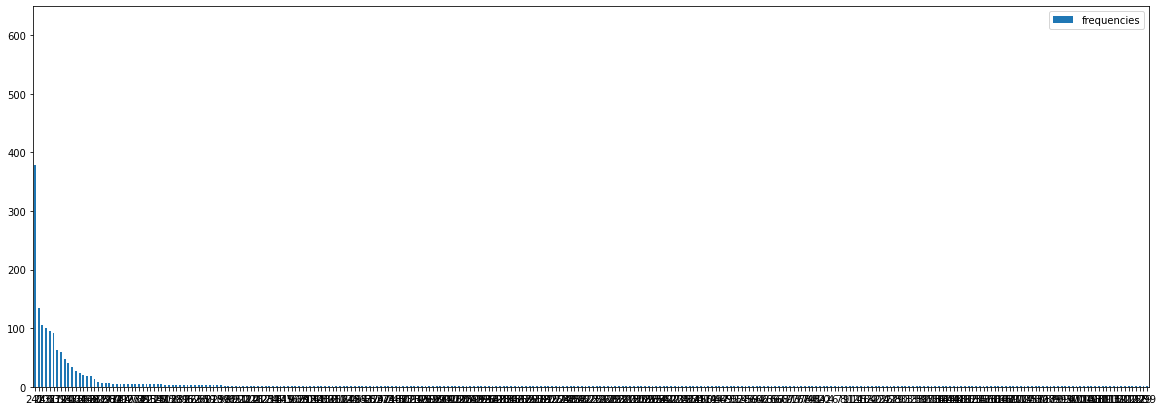

In [28]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 50
df = pd.DataFrame({'frequencies': term_frequencies[:300], 'feature_names': count_vect.get_feature_names()[0:300]})
df = df.sort_values(by=['frequencies'], ascending=False)
ax = df.plot.bar(rot=0, ylim = [0, upper_bound], figsize = (20,7))

## Discretization and Binarization

In [29]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [30]:
mlb = preprocessing.LabelBinarizer()

In [31]:
mlb.fit(X.category)

LabelBinarizer()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [32]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

# 2. follow the same process from the DM2020-Lab1-Master Repo on the new dataset

In [33]:
# my helper functions
import helpers.data_process_helpers as dph

## Data Preparation

In [34]:
# categories according to the dataset
categories = ['negative', 'positive']

In [35]:
# load Sentiment Labelled Sentences Data Set
data = dph.load_file_in_folder("sentiment labelled sentences")
data

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0',
 'Good case, Excellent value.\t1',
 'Great for the jawbone.\t1',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0',
 'The mic is great.\t1',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0',
 'If you are Razr owner...you must have this!\t1',
 'Needless to say, I wasted my money.\t0',
 'What a waste of money and time!.\t0',
 'And the sound quality is great.\t1',
 'He was very impressed when going from the original battery to the extended battery.\t1',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0',
 'Very good quality though\t1',
 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0',
 'Highly recommend for any one wh

## Data Transformation

### Converting Dictionary into Pandas Dataframe

In [36]:
X_new = pd.DataFrame.from_records(dph.format_row_from_file(data), columns= ['text'])

In [37]:
# raw data
X_new[:10]

text
0  So there is no way for me to plug it in here i...
1                     Good case, Excellent value.\t1
2                          Great for the jawbone.\t1
3  Tied to charger for conversations lasting more...
4                               The mic is great.\t1
5  I have to jiggle the plug to get it to line up...
6  If you have several dozen or several hundred c...
7     If you are Razr owner...you must have this!\t1
8             Needless to say, I wasted my money.\t0
9                What a waste of money and time!.\t0

### Adding Columns

In [38]:
# get category from raw data
X_new['category'] = dph.data_split(data, '\t', 1)

In [39]:
# add category label also
X_new['category_name'] = X_new.category.apply(lambda t: categories[int(t)])

### Familiarizing yourself with the Data

In [40]:
# using loc (by position)
X_new.iloc[::10, 0:2][0:10]

text category
0   So there is no way for me to plug it in here i...        0
10                 And the sound quality is great.\t1        1
20  I went on Motorola's website and followed all ...        0
30  This is a simple little phone to use, but the ...        0
40  It has a great camera thats 2MP, and the pics ...        1
50  Not loud enough and doesn't turn on like it sh...        0
60  Essentially you can forget Microsoft's tech su...        0
70                               Mic Doesn't work.\t0        0
80   I wear it everyday and it holds up very well.\t1        1
90  For a product that costs as much as this one d...        0

## Data Mining using Pandas

### Missing Values

In [41]:
# check if there is any missing value
X_new.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2995  False     False          False
2996  False     False          False
2997  False     False          False
2998  False     False          False
2999  False     False          False

[3000 rows x 3 columns]

In [42]:
X_new.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [43]:
# add dummy record to test how to deal with missing value
len(X_new) # check row counts

3000

In [44]:

dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X_new = X_new.append(dummy_dict, ignore_index=True)

In [45]:
len(X_new) # check row counts

3001

In [46]:
# check the missing value added
X_new.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [47]:
# drop missing value
X_new.dropna(inplace=True)

In [48]:
len(X_new)

3000

### Dealing with Duplicate Data

In [49]:
# check if there is any duplicate data
X_new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [50]:
sum(X_new.duplicated())

17

In [51]:
sum(X_new.duplicated('text'))

17

In [52]:
# the dataset has duplicate data already, so I just try to remove the original duplicate data
X_new.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [53]:
len(X_new)

2966

## Data Preprocessing

### Sampling

In [54]:
X_new_sample = X_new.sample(n=1000) #random state

### To generate some visualizations

<AxesSubplot:title={'center':'Category distribution'}>

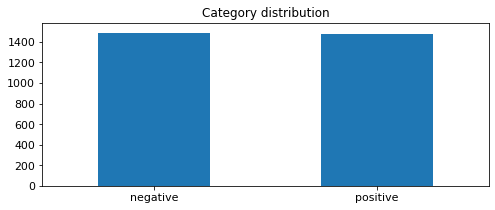

In [55]:
upper_bound = max(X_new.category_name.value_counts()) + 100
# plot barchart for X_sample
X_new.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

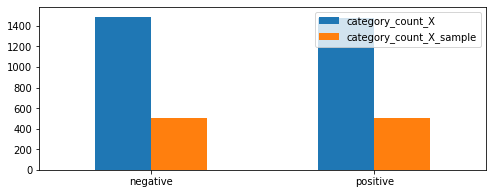

In [56]:
# do a side-by-side comparison of the distribution between the two datasets(original and sampling)
type(X.category_name.value_counts())
X_counts = X_new.category_name.value_counts()
X_sample_counts = X_new_sample.category_name.value_counts()
# create a dataframe combine two series
df = pd.DataFrame({'category_count_X': X_counts,
                   'category_count_X_sample': X_sample_counts}, index=categories)
ax = df.plot.bar(rot=0, ylim = [0, upper_bound], figsize = (8,3))

### Feature Creation

In [57]:
# add unigram generate by text
X_new['unigrams'] = X_new['text'].apply(lambda x: dmh.tokenize_text(x))

### Feature subset selection

In [58]:
count_vect = CountVectorizer()

In [59]:
X_new_counts = count_vect.fit_transform(X_new.text)

In [60]:
analyze = count_vect.build_analyzer()

In [61]:
X_new_counts.shape

(2966, 5153)

In [62]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [63]:
X_new_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [65]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [66]:
# for showing the 1 vector, extract data from 20 to 40
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[20:40]]
# obtain sen index
plot_y = ["sen_"+ str(i) for i in list(X_new.index)[20:40]]
plot_z = X_new_counts[20:40, 20:40].toarray()

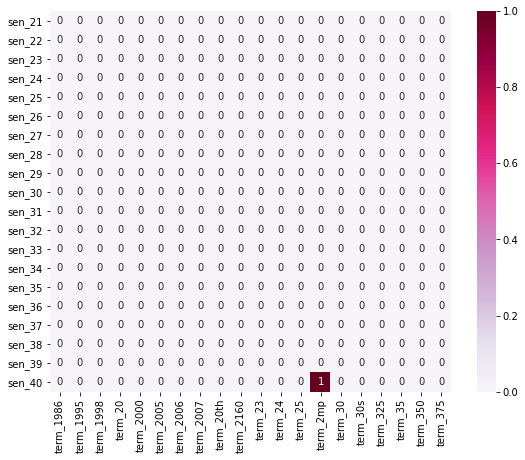

In [67]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [68]:
X_new_reduced = PCA(n_components = 2).fit_transform(X_new_counts.toarray())

In [69]:
X_new_reduced.shape

(2966, 2)

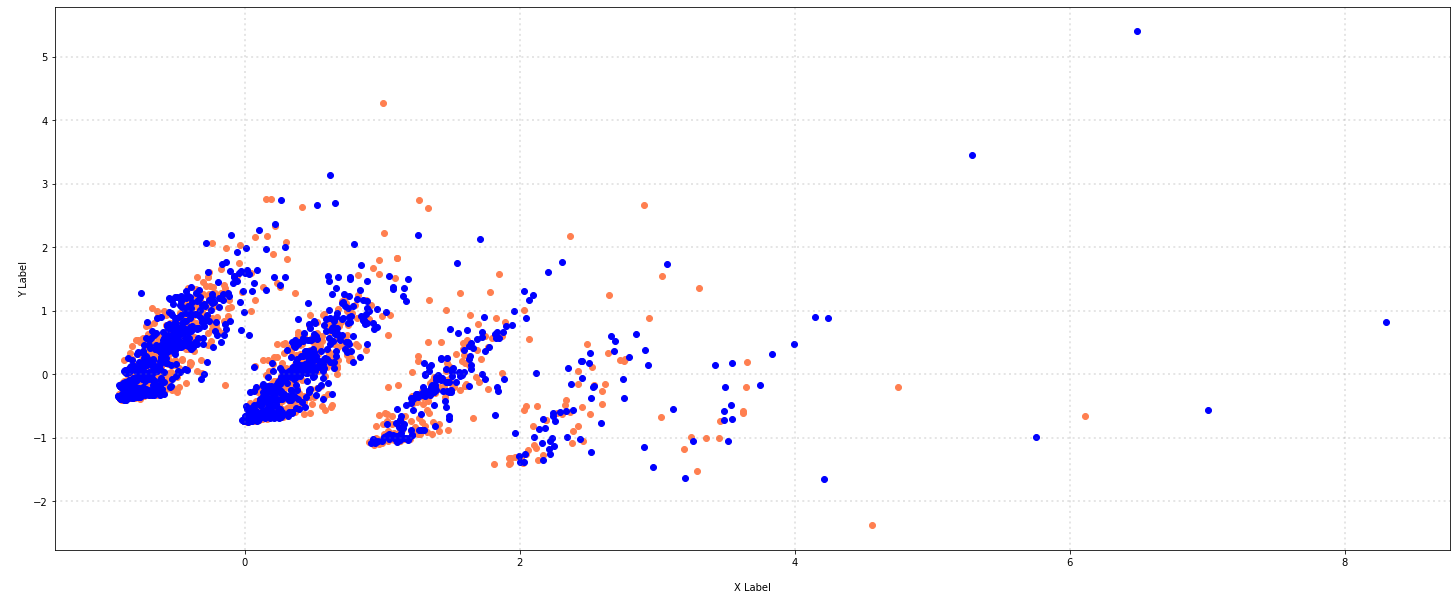

In [70]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_new_reduced[X_new['category_name'] == category].T[0]
    ys = X_new_reduced[X_new['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Atrribute Transformation / Aggregation

In [71]:
# compute the frequencies for all term
term_frequencies = []
for j in range(0,X_new_counts.shape[1]):
    term_frequencies.append(sum(X_new_counts[:,j].toarray()))

In [72]:
term_frequencies = np.asarray(X_new_counts.sum(axis=0))[0]

In [73]:
term_frequencies[0]

1

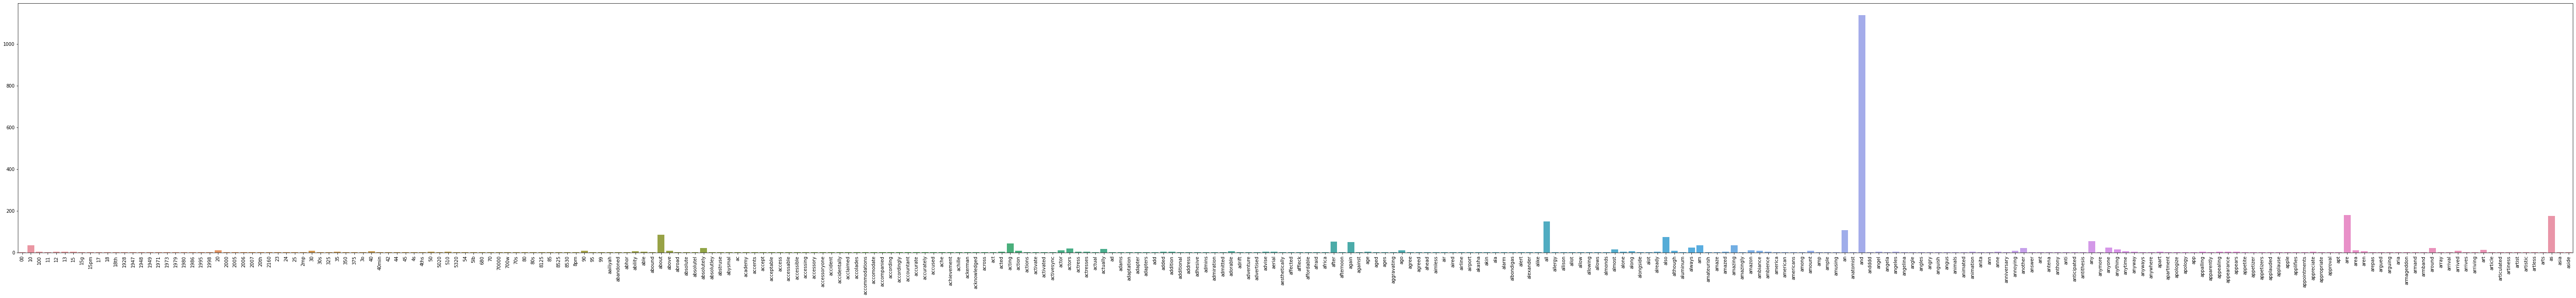

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [75]:
#  log distribution makes it easily visualize the distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

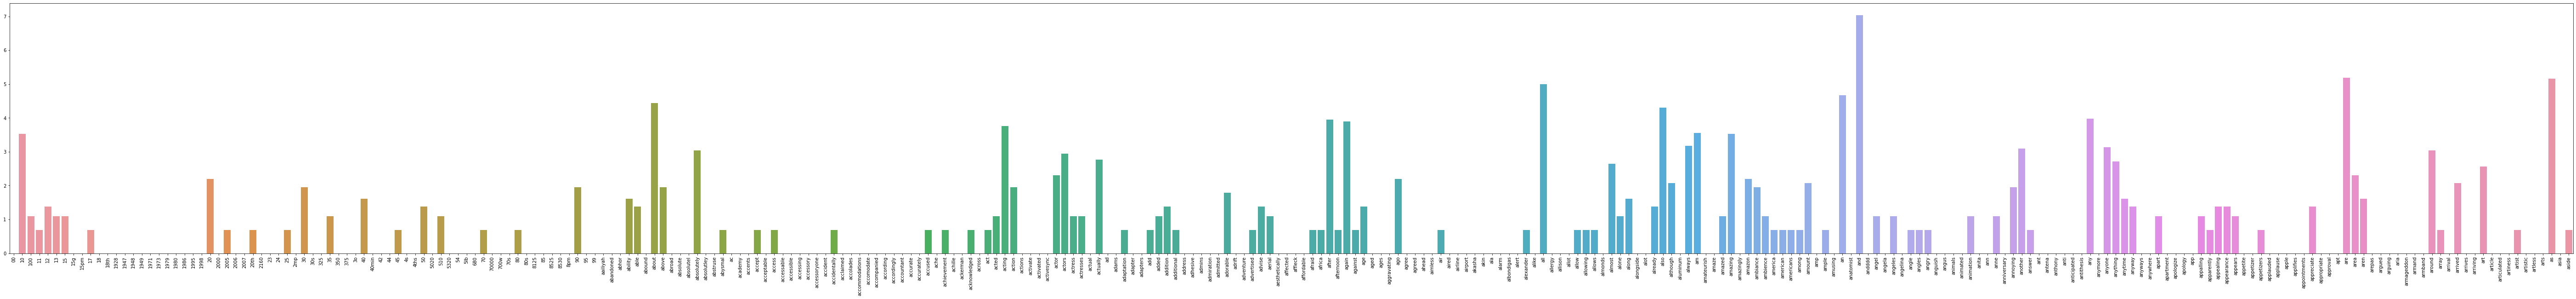

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### Discretization and Binarization

In [77]:
# transformation as one-hot encoding
mlb.fit(X_new.category)

LabelBinarizer()

In [78]:
X_new['bin_category'] = mlb.transform(X_new['category']).tolist()

In [79]:
X_new[0:9]

text category category_name  \
0  So there is no way for me to plug it in here i...        0      negative   
1                     Good case, Excellent value.\t1        1      positive   
2                          Great for the jawbone.\t1        1      positive   
3  Tied to charger for conversations lasting more...        0      negative   
4                               The mic is great.\t1        1      positive   
5  I have to jiggle the plug to get it to line up...        0      negative   
6  If you have several dozen or several hundred c...        0      negative   
7     If you are Razr owner...you must have this!\t1        1      positive   
8             Needless to say, I wasted my money.\t0        0      negative   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1            [Good, case, ,, Excellent, value, ., 1]          [1]  
2                   [Great, for, the, jawbone, ., 1]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                        [The, mic, is, great, ., 1]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8  [Needless, to, say, ,, I, wasted, my, money, ....          [0]

## Data Exploration

In [80]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
sentence_to_transform_1 = []
random_record_1 = X_new.iloc[50]
random_record_1 = random_record_1['text']
sentence_to_transform_1.append(random_record_1)

sentence_to_transform_2 = []
random_record_2 = X_new.iloc[100]
random_record_2 = random_record_2['text']
sentence_to_transform_2.append(random_record_2)

sentence_to_transform_3 = []
random_record_3 = X_new.iloc[150]
random_record_3 = random_record_3['text']
sentence_to_transform_3.append(random_record_3)

In [81]:
print(sentence_to_transform_1)
print(sentence_to_transform_2)
print(sentence_to_transform_3)

['good protection and does not make phone too bulky.\t1']
['Buyer Beware, you could flush money right down the toilet.\t0']
['Audio Quality is poor, very poor.\t0']


In [82]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
sentence_vector_count_1 = count_vect.transform(sentence_to_transform_1)
sentence_vector_count_2 = count_vect.transform(sentence_to_transform_2)
sentence_vector_count_3 = count_vect.transform(sentence_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
sentence_vector_count_1_bin = binarize(sentence_vector_count_1)
sentence_vector_count_2_bin = binarize(sentence_vector_count_2)
sentence_vector_count_3_bin = binarize(sentence_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(sentence_vector_count_1.todense())
print(sentence_vector_count_2.todense())
print(sentence_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(sentence_vector_count_2, sentence_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## 3. tasks on the new dataset

### Generate meaningful new data visualizations

#### try to generate wordcloud for positive and negative sentence apart

In [84]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [97]:
# get negative data and positive data
negative_data = X_new.query('category_name == \'negative\'')
positive_data = X_new.query('category_name == \'positive\'')

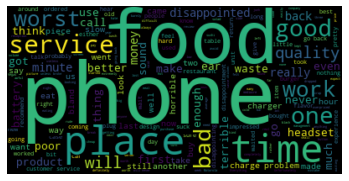

In [98]:
# negative wordcloud
negative_data
negative_word = ''
for d in negative_data.text[:1000]:
    negative_word += ' '+d
wordcloud = WordCloud().generate(negative_word)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

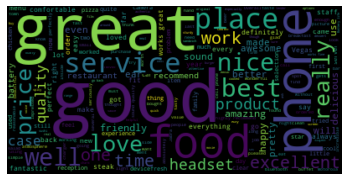

In [99]:
# positive wordcloud
positive_word = ''
for d in positive_data.text[:1000]:
    positive_word += ' '+d
wordcloud = WordCloud().generate(positive_word)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Generate TF-IDF features from the tokens of each text

In [111]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
transformer = TfidfTransformer(smooth_idf=True)

In [114]:
X_new_vector = count_vect.fit_transform(data)

In [115]:
tfidf_X = transformer.fit_transform(X_new_vector)

In [125]:
X_new_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [134]:
#rebuild the X_new dataframe
X_new = pd.DataFrame.from_records(dph.format_row_from_file(data), columns= ['text'])
# get category from raw data
X_new['category'] = dph.data_split(data, '\t', 1)

In [135]:
tfidf_df = pd.DataFrame(X_new_vector.toarray(),columns=count_vect.get_feature_names(), index = X_new.text)

In [119]:
tfidf_df

00  10  100  11  12  13  \
text                                                                          
So there is no way for me to plug it in here in...   0   0    0   0   0   0   
Good case, Excellent value.\t1                       0   0    0   0   0   0   
Great for the jawbone.\t1                            0   0    0   0   0   0   
Tied to charger for conversations lasting more ...   0   0    0   0   0   0   
The mic is great.\t1                                 0   0    0   0   0   0   
...                                                 ..  ..  ...  ..  ..  ..   
I just got bored watching Jessice Lange take he...   0   0    0   0   0   0   
Unfortunately, any virtue in this film's produc...   0   0    0   0   0   0   
In a word, it is embarrassing.  \t0                  0   0    0   0   0   0   
Exceptionally bad!  \t0                              0   0    0   0   0   0   
All in all its an insult to one's intelligence ...   0   0    0   0   0   0   

                                                    15  15g  15pm  17  ...  \
text                                                                   ...   
So there is no way for me to plug it in here in...   0    0     0   0  ...   
Good case, Excellent value.\t1                       0    0     0   0  ...   
Great for the jawbone.\t1                            0    0     0   0  ...   
Tied to charger for conversations lasting more ...   0    0     0   0  ...   
The mic is great.\t1                                 0    0     0   0  ...   
...                                                 ..  ...   ...  ..  ...   
I just got bored watching Jessice Lange take he...   0    0     0   0  ...   
Unfortunately, any virtue in this film's produc...   0    0     0   0  ...   
In a word, it is embarrassing.  \t0                  0    0     0   0  ...   
Exceptionally bad!  \t0                              0    0     0   0  ...   
All in all its an insult to one's intelligence ...   0    0     0   0  ...   

                                                    yucky  yukon  yum  yummy  \
text                                                                           
So there is no way for me to plug it in here in...      0      0    0      0   
Good case, Excellent value.\t1                          0      0    0      0   
Great for the jawbone.\t1                               0      0    0      0   
Tied to charger for conversations lasting more ...      0      0    0      0   
The mic is great.\t1                                    0      0    0      0   
...                                                   ...    ...  ...    ...   
I just got bored watching Jessice Lange take he...      0      0    0      0   
Unfortunately, any virtue in this film's produc...      0      0    0      0   
In a word, it is embarrassing.  \t0                     0      0    0      0   
Exceptionally bad!  \t0                                 0      0    0      0   
All in all its an insult to one's intelligence ...      0      0    0      0   

                                                    yun  z500a  zero  zillion  \
text                                                                            
So there is no way for me to plug it in here in...    0      0     0        0   
Good case, Excellent value.\t1                        0      0     0        0   
Great for the jawbone.\t1                             0      0     0        0   
Tied to charger for conversations lasting more ...    0      0     0        0   
The mic is great.\t1                                  0      0     0        0   
...                                                 ...    ...   ...      ...   
I just got bored watching Jessice Lange take he...    0      0     0        0   
Unfortunately, any virtue in this film's produc...    0      0     0        0   
In a word, it is embarrassing.  \t0                   0      0     0        0   
Exceptionally bad!  \t0                               0      0     0        0

### Implement a simple Naive Bayes classifier

In [145]:
# automatic instruments to compute the frequencies of terms
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
# Multinomial naive Bayes instance
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

### Build with tfidf

In [136]:
dic_list = []
for vetor_list in X_new_vector.toarray():
    dic_list.append(dict(zip(count_vect.get_feature_names(), vetor_list)))
dic_list
X = dv.fit_transform(dic_list)
Y = np.array(X_new.category)

In [137]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
mnb.fit(X, Y)

MultinomialNB()

In [144]:
# test
import random
random_text = random.choice(data)
test_vector = count_vect.transform([random_text]).toarray()
test_list = []
test_list.append(dict(zip(count_vect.get_feature_names(), test_vector[0])))
mnb.predict(dv.fit_transform(test_list))

array(['1'], dtype='<U1')